5.비선형SVM_커널트릭

Contents
<div id="toc"></div>

# 1. 비선형 데이터의 변환

- 비선형 데이터의 특성을 다항식 형태로 변환한다는 것은 더 **상위의 차원으로 사상**(mapping, projection)시킨다는 의미이다.
- 이를 통해, 비선형 데이터를 선형의 결정 경계 상에서 구분할 수 있게 된다.

<img src="img/ch5_1.png" width="70%">

## 비선형 데이터에 대한 특성 확장의 문제

- 비선형 데이터의 특성을 다항식 형태로 명시적으로 변환하여 선형 분류를 수행하는 것은 절차가 명확하고 특정 기법에 종속되지 않는다는 장점이 있다.
- 그러나 다항식의 차수에 따라 모형의 성능 상의 문제 또는 계산량 증가의 문제가 발생한다.
    - 차수가 낮은 경우, 복잡한 유형의 데이터를 잘 표현하지 못 한다.
    - 차수가 높은 경우, 특성이 많아지므로 분석 수행에 많은 시간이 소요된다.

# 2. 커널 트릭 (Kernel Trick)

- 일련의 계산을 통해서 <span class="mark">실제로는 데이터의 특성을 확장하지 않으면서 특성을 확장한 것과 동일한 효과</span>를 가져오는 기법
- 즉, 비선형 데이터를 상위 차원으로 사상시키는 연산에서 적용되는 함수 또는 방법을 통칭한다.
- 커널 트릭(함수)을 적용하여 클래스들 간의 비선형 결정 경계를 유도할 수 있게 된다.
- 사이킷런 **svm** 모듈 내의 **SVC**에는 이러한 커널 트릭들이 이미 구현되어 있다.

## 2.1. 다항식 커널 (Polynomial Kernel)

- 데이터가 가지고 있는 원래 특성들 간의 가능한 조합을 특정 차수(degree)까지 모두 계산하는 방식
- **SVC**를 이용하여 객체를 생성할 때 **kernel**에 ‘**poly**’를 적용한다.
    - 매개변수 **kernel**은 커널 트릭의 이름이다. 다항식 커널 적용을 위해서 ‘poly’를 사용한다.
    - 매개변수 **degree**는 다항식 커널에서만 사용되는 최대 차수이며, 기본값은 3이다.
    - 매개변수 **coef0**은 다항식 커널과 시그모이드 커널에서만 사용되는 상수값이며, 기본값은 0이다.
    - 매개변수 **gamma**는 커널 반경의 민감도를 결정하는 값이다. 기본 설정은 ‘auto’로서 1÷(특성 수)로 계산된다.
        - 결정 경계의 곡률을 결정함, gamma 값이 높을수록 예민하게 바뀜

- **SVC**를 이용하여 객체를 생성할 때 **kernel**에 ‘**poly**’를 적용한다.

In [17]:
# 실제로는 poly로 차원확장을 하지않음
import sklearn.datasets as d
from sklearn import svm

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

svm_clf = svm.SVC(C=10, kernel='poly',\
                  degree=3, \
                  coef0=1, \
                  gamma='auto')
clf = svm_clf.fit(X, y)

- 3차 다항식 커널을 적용한 비선형 SVM 분류의 결과이다.

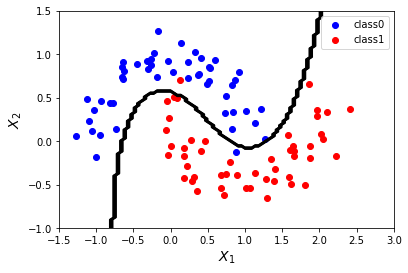

In [18]:
import numpy as np
import matplotlib.pyplot as plt


X1s = np.linspace(-1.5, 3.0, 100)
X2s = np.linspace(-1, 1.5, 100)

X1, X2 = np.meshgrid(X1s, X2s)

XX = np.vstack((X1.ravel(), X2.ravel())).transpose()
y_pred = clf.predict(XX)
y_pred_s = y_pred.reshape(X1.shape)

plt.contour(X1s, X2s, y_pred_s, colors='black')

plt.xlabel('$X_{1}$', fontsize=14)
plt.ylabel('$X_{2}$', fontsize=14)
#################################################################
c_set = ['b', 'r']
l_set = ['class0', 'class1']

for t in set(y):
    X_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]

    plt.scatter(X_pts,y_pts, c=c_set[t], label=l_set[t])
plt.legend()
plt.show()

## 2.2. 다항식 커널에서의 degree의 영향

- 최대 차수가 높을수록 복잡한 유형에 대한 분류 성능이 좋은 반면, 그만큼 과대적합의 가능성이 있다.
- 최대 차수가 낮을수록 이와 반대의 결과가 도출된다.

<img src="img/ch5_2.png" width="70%">

## 2.3. 다항식 커널에서의 coef0의 영향

- 상수 coef0는 높은 차수에서의 계산 값의 영향이 지나치게 크게 적용되는 것을 조절하는 역할을 한다.
- 계산 결과 값에 대한 일종의 스케일링을 한 것과 유사하다.

<img src="img/ch5_3.png" width="70%">

## 2.4. 다항식 커널에서의 gamma의 영향

- gamma가 커질수록 결정 경계가 데이터 분포에 더욱 민감해지고, gamma가 작을수록 반경이 커지면서 결정 경계가 부드러운 형태를 띈다.

<img src="img/ch5_4.png" width="70%">

# 3. RBF 커널 (RBF Kernel)

- 데이터의 특성을 무한한 모든 차수의 모든 다항식으로 확장하는 방사형 기저 함수(RBF; radial basis function) 방식
- **SVC**를 이용하여 객체를 생성할 때 **kernel**을 ‘**rbf**’로 적용한다.
    - 매개변수 **kernel**은 커널 트릭의 이름이다. RBF 커널을 적용하기 위해서 ‘rbf’를 사용한다.
    - 매개변수 **gamma**는 커널 반경의 민감도를 결정하는 값이다. 기본 설정은 ‘auto’로서, 1÷(특성 수)로 계산된다.

- **SVC**를 이용하여 객체를 생성할 때 **kernel**을 ‘**rbf**’로 적용한다.

In [19]:
import sklearn.datasets as d
from sklearn import svm

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

svm_clf = svm.SVC(C=10, kernel='rbf', gamma='auto')

clf = svm_clf.fit(X, y)

- RBF 커널을 적용한 비선형 SVM 분류의 결과이다

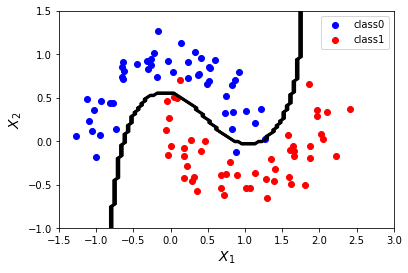

In [21]:
import numpy as np
import matplotlib.pyplot as plt


X1s = np.linspace(-1.5, 3.0, 100)
X2s = np.linspace(-1, 1.5, 100)

X1, X2 = np.meshgrid(X1s, X2s)

XX = np.vstack((X1.ravel(), X2.ravel())).transpose()
y_pred = clf.predict(XX)
y_pred_s = y_pred.reshape(X1.shape)

plt.contour(X1s, X2s, y_pred_s, colors='black')

plt.xlabel('$X_{1}$', fontsize=14)
plt.ylabel('$X_{2}$', fontsize=14)
#################################################################
c_set = ['b', 'r']
l_set = ['class0', 'class1']

for t in set(y):
    X_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]

    plt.scatter(X_pts,y_pts, c=c_set[t], label=l_set[t])
plt.legend()
plt.show()

## 3.1. RBF 커널에서의 gamma의 영향

- gamma가 커질수록 결정 경계의 곡률이 커지는 것이므로 과대적합이 되며, gamma가 작을수록 곡률이 작아지므로 과소적합이 된다.

<img src="img/ch5_5.png" width="70%">

# 참고) 주요 커널트릭 요약

구분 | 적용<br>커널명 | 하이퍼<br>파라미터 | 개요/설명
:---: | :---: | :--- | :---
선형 커널 | linear | C | 커널 트릭이 적용되지 않고 기본적인 소프트 마진 분류를 수행한다.
다항식 커널 | poly | C<br>degree<br>coef0<br>(gamma) | 특성을 지정한 특정 차수까지 변환하여 확장하는 방식이다.<br>이미지 처리 등에 주로 사용된다.
RBF 커널 | rbf | C<br>gamma | 무한대 차원의 특성으로 변환하는 방식으로, 가우시안 커널이라고도 한다.<br>데이터가 너무 크지만 않으면 일반적으로 가장 성능이 좋다.
시그모이드 커널 | sigmoid | C<br>coef0<br>(gamma) | 시그모이드 곡선의 tanh 함수가 적용되며, 신경망 학습에서 사용되는 경우가 많다.

# 참고) 규제 수준의 조절을 위한 C와 gamma 값의 설정

- 매개변수 C는 “얼마나 여유를 가지고 오류를 허용할 것인지”결정한다.
    - C 값이 **높으면** 마진이 좁아지고 오분류가 적어지며 **과대적합**이 될 수 있다.
    - C 값이 **낮으면** 마진이 넓어지고 오분류가 많아지며 **과소적합**이 될 수 있다.
- 매개변수 gamma는 “결정 경계를 얼마나 데이터에 민감하게 반응시킬 것인지” 결정한다.
    - gamma 값이 **높으면** 한 데이터에 영향을 크게 받으며 **과대적합**이 될 수 있다.
    - gamma 값이 **낮으면** 한 데이터에 영향을 적게 받으며 **과소적합**이 될 수 있다.

- 매개변수 C와 gamma의 값은 분류 모형의 성능과 밀접한 연관이 있다.
    - 이들의 값이 클수록, 모형의 복잡도가 증가한다.
    - 이들의 값이 작을수록, 모형의 복잡도가 감소한다.


- 따라서 학습을 수행할 때 **GridSearchCV** 등을 이용하여 모형의 성능을 극대화하는 C와 gamma의 최적값을 찾아낼 필요가 있다

<img src="img/ch5_6.png" width="70%">

# 참고) 서포트 벡터 머신

- 궁극적인 의미에서의 **서포트 벡터 머신**이란, 서포트 벡터 분류기(support vector classifier)와 커널 기법을 결합하여 분류를 수행하는 분류기를 의미한다.

분류기 | 분류 전략 | 분류 형태 | 오류 허용 | 커널 트릭
:---: | :---: | :---: | :---: | :---: 
최대 마진 분류기 | 하드 마진 분류 | 선형 | X | X
서포트 벡터 분류기 | 소프트 마진 분류 | 선형 | O | X<br>(선형 커널)
서포트 벡터 머신 | 소프트 마진 분류 | 선형 및<br>비선형 | O | O

In [22]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>